# Computational Mathematics  <a class="tocSkip">

## Probability (and some first steps towards Machine Learning) <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---covariance-matrices-for-the-Iris-flowers-per-species" data-toc-modified-id="Homework---covariance-matrices-for-the-Iris-flowers-per-species-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - covariance matrices for the Iris flowers per species</a></span></li><li><span><a href="#Homework---die-rolling-experiment" data-toc-modified-id="Homework---die-rolling-experiment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - die-rolling experiment</a></span></li><li><span><a href="#Homework---the-Gaussian-integral" data-toc-modified-id="Homework---the-Gaussian-integral-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - the Gaussian integral</a></span></li><li><span><a href="#Homework---normal-distribution-plotting" data-toc-modified-id="Homework---normal-distribution-plotting-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - normal distribution plotting</a></span></li><li><span><a href="#Homework---CDF" data-toc-modified-id="Homework---CDF-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - CDF</a></span></li><li><span><a href="#Homework---Monte-Carlo-simulation" data-toc-modified-id="Homework---Monte-Carlo-simulation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Monte-Carlo simulation</a></span></li><li><span><a href="#Homework---Naive-Bayes-classifier" data-toc-modified-id="Homework---Naive-Bayes-classifier-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Naive Bayes classifier</a></span></li><li><span><a href="#Homework----Maximum-likelihood-estimation" data-toc-modified-id="Homework----Maximum-likelihood-estimation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework -  Maximum likelihood estimation</a></span></li><li><span><a href="#Homework---the-logistic-function-and-its-derivative" data-toc-modified-id="Homework---the-logistic-function-and-its-derivative-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - the logistic function and its derivative</a></span></li><li><span><a href="#Homework---PCA-for-the-Iris-dataset-[$\star$]" data-toc-modified-id="Homework---PCA-for-the-Iris-dataset-[$\star$]-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - PCA for the Iris dataset [$\star$]</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
%precision 4
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [3]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
# https://seaborn.pydata.org/
# "Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics."
import seaborn as sns
# switch to seaborn figure aesthetic defaults
#sns.set_theme()
sns.set()

# Homework

## Homework - covariance matrices for the Iris flowers per species

Recreate the covariance "eye-ball" correlation guessing and associated calculation for each Iris flower species in turn, i.e. do it on a per-colour basis.

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
irisdf = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# let's ignore the final column - the `target` or `class` variable
irisdf.iloc[:, :-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


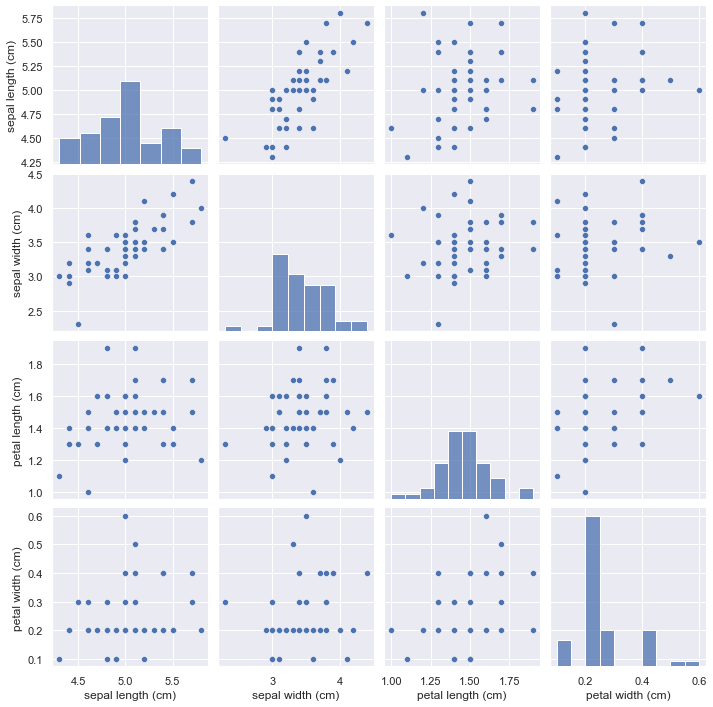

In [6]:
iris_setosa = irisdf.loc[irisdf.target == 0,]
sns.pairplot(iris_setosa, vars=iris_setosa.columns[:-1]) #, hue='target')

In [7]:
iris_setosa.iloc[:, :-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.124249,0.099216,0.016355,0.010331
sepal width (cm),0.099216,0.143690,0.011698,0.009298
petal length (cm),0.016355,0.011698,0.030159,0.006069
petal width (cm),0.010331,0.009298,0.006069,0.011106


## Homework - die-rolling experiment

Investigate how the probabilities computed for the die-rolling experiment equalise as you increase the number of times you roll the die.

In [8]:
def dice_experiment(n):
    # set the seed to make the random experiment reproducible
    # if you exclude this you should get a different result each time you run
    #np.random.seed(1)
    # return n rolls from the S = {1, 2, 3, 4, 5, 6} sample space
    return np.random.randint(low=1, high=7, size=n)

def probabilities(outcomes):
    # Extract the number of occurences for each outcome
    values, counts = np.unique(outcomes, return_counts=True)
    n = len(outcomes)  # total number of outcomes   
    return values, counts/n

def plot_probability_mass_function(values, probabilities):
    # Plot the probability mass function
    plt.stem(values, probabilities, use_line_collection=True)

    # Axis labels
    plt.xlabel(r'$x$')
    plt.ylabel(r'$P(x)$')

    # Ensure that ticks are displayed with the right step
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    plt.show()

In [9]:
n = 1000  # number of die rolls
outcomes = dice_experiment(n)

In [10]:
values, proba = probabilities(outcomes)
values, proba

(array([1, 2, 3, 4, 5, 6]), array([0.169, 0.157, 0.15 , 0.164, 0.182, 0.178]))

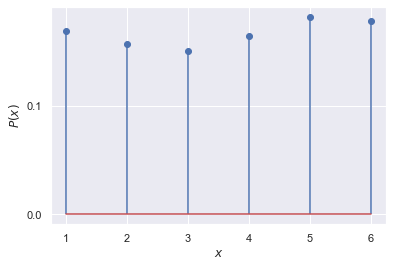

In [11]:
plot_probability_mass_function(values, proba)

## Homework - the Gaussian integral

A useful definite integral to know is the area under the function $e^{-x^2}$ over the whole real line:

$$\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}$$

This result is known as the [Gaussian integral](https://en.wikipedia.org/wiki/Gaussian_integral>).

Read the description at the above link for how this integral can be (relatively) easily established if you know about polar coordinates and know the "trick".

<br>

Once we have this key result we can establish that 

$$\int_{-\infty}^{\infty} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }\, dx = \sigma\sqrt{2\pi}$$

and thus by dividing through by the quantity on the RHS we have a function

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }$$

(note that this is the [**Gaussian function**](https://en.wikipedia.org/wiki/Gaussian_function))which has the property that its integral over the entire real line is unity.

<br>

Can you see how to establish that 

$$\int_{-\infty}^{\infty} e^{-x^2}\, dx = \sqrt{\pi}  
\implies
\int_{-\infty}^{\infty} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }\, dx = \sigma\sqrt{2\pi}
$$

through two changes of variables?

## Homework - normal distribution plotting

As mentioned in class, take the code that randomly draws data from a normal distribution, plot it with different numbers of bins, sample size etc, and check how well it agrees with the normal distribution/Gaussian function.

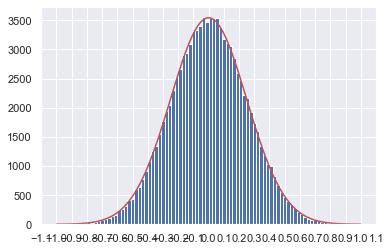

In [12]:
# set the seed to make the random experiment reproducible
np.random.seed(123)

mean = 0
standard_deviation = 0.25
n = 100000
xmax = 1
xmin = -1

# Draw outcomes from a normal distribution
outcomes = np.random.normal(loc=mean, scale=standard_deviation, size=n)

# Plot histogram
hist = plt.hist(outcomes, bins=90, range=(xmin, xmax))

# Gauss
x = np.linspace(xmin, xmax, 100)
y = scipy.stats.norm.pdf(x,mean,standard_deviation)

# Set the ticks step size
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.plot(x, (n/45)*y, 'r')

plt.show()

## Homework - CDF

Recall the following plot from the lecture that used `normal_distribution.cdf`.

Recreate this plot using only data obtained from `normal_distribution.pdf` and the mathematical definition of the CDF in terms of the PDF.

In [13]:
mean = 0
standard_deviation = 0.1
# Define the normal distribution
normal_distribution = scipy.stats.norm(mean, standard_deviation)

# Compute CDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)

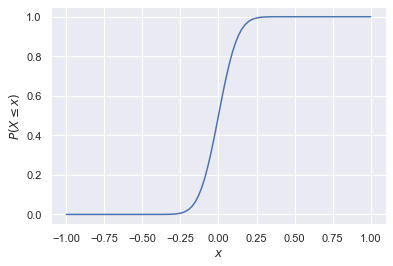

In [14]:
y_values = normal_distribution.cdf(x_values)

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

In [16]:
from scipy.integrate import quad

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,mean,standard_deviation)
    return value

y_values = np.zeros_like(x_values)
dt = x_values[1] - x_values[0]

for i in range(len(y_values)):
    x0 = x_values[0]
    x_plusdelta = x_values[i]+dt
    x_minusdelta = x_values[i] - dt
    res1, err = quad(normal_distribution_function, x_minusdelta, x_plusdelta)
    y_values[i] = res1

In [17]:
sum(y_values)
res = [sum(y_values[:i])/2 for i in range(len(y_values))] 
# why do I have to divide by two.. ? ohterwise I don't have good results

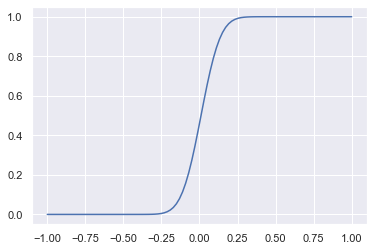

In [18]:
plt.plot(x_values, res)

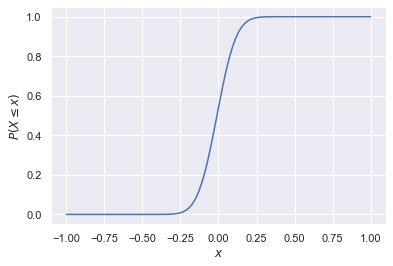

In [19]:
#teacher 's correction

mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = scipy.stats.norm(mean, standard_deviation)

# Compute CDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
# what's the distance between our x values, i.e. out dx
dx = x_values[1]-x_values[0]
# set up an array of the right size made up up of zeros
y_values = np.zeros_like(x_values)
# now work from left to right summing the pdf values multiplied by the x spacing
# skip the first entry which is zero
for i, x in enumerate(x_values[1:]):
    y_values[i+1] = y_values[i] + normal_distribution.pdf(x_values[i+1])*dx

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

## Homework - Monte-Carlo simulation

Extend the calculation of $\pi$ example from class to use a sphere within a box of unit size, i.e. with one corner at the origin $(0,0,0)$ and the other corners at
$(1,0,0)$, $(0,1,0)$, ..., $(1,1,1)$.


In [22]:
import random

n_total = 1_000_000  # total number of points
x = np.random.uniform(low=-1, high=1, size=n_total)
y = np.random.uniform(low=-1, high=1, size=n_total)
z = np.random.uniform(low=-1, high=1, size=n_total)

dis = np.sqrt((x**2) + (y**2) + (z**2))  # distance from the origin (0, 0)

n_circle = sum(dis<=1)  # number of points falling in the circle
pi_estimate = 6 * n_circle/n_total

print(f'The estimate of pi is {pi_estimate}.')

The estimate of pi is 3.14607.


## Homework - Naive Bayes classifier


Repeat the naive Bayes classification for the Iris dataset, but use [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into test and training sets, using the training set for training and test set to calculate the accuracy in the end. 

Below is the code and application from class that gave an accuracy of 96%.

In [23]:
# Calculate the means and standard deviations for our four features and three species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()


# Define the normal distributions for each
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([scipy.stats.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p



def calc_likelihood(data):
    class_probs = []
    for cls in range(3):
        p = cls_probablility(data, cls, distributions)
        class_probs.append(p)
    return class_probs



# Subscripting to remove the last column which is the target variable
# these are therefore the means and stds of the entire 150 rows of data, 
# i.e. all of our measurements
means = irisdf.mean().to_numpy()[0:4]
stds = irisdf.std().to_numpy()[0:4]

prior_dists = [scipy.stats.norm(m, s) for m, s in zip(means, stds)]

def calc_prior_X(data):
    p = 1
    for feat in range(4):
        p *= calc_probability(data[feat], prior_dists[feat])
    return p


def calc_naive_bayes(data):
    likelihood = calc_likelihood(data)
    # From the data, we know that all three classes are equally likely
    class_prior = [0.33, 0.33, 0.33]
    data_prior = calc_prior_X(data)
    
    class_densities = [(l*cp) / data_prior for l, cp in zip(likelihood, class_prior)]
    class_probs = [cd / sum(class_densities) for cd in class_densities]
    
    return class_probs



# Now we will be using our trained model to do inference 
predictions = [np.argmax(calc_naive_bayes(X)) for X in iris['data']]

correct_predictions = [1 if prediction==target else 0 for prediction, target in zip(predictions, iris['target'])]

accuracy = float(sum(correct_predictions)/len(correct_predictions))

print(f'Accuracy = {accuracy}')

Accuracy = 0.96


In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(irisdf, test_size=0.25)

# Calculate the means and standard deviations for our four features and three species
means = train.groupby('target').mean().to_numpy()
stds = train.groupby('target').std().to_numpy()


# Define the normal distributions for each
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([scipy.stats.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p



def calc_likelihood(data):
    class_probs = []
    for cls in range(3):
        p = cls_probablility(data, cls, distributions)
        class_probs.append(p)
    return class_probs



# Subscripting to remove the last column which is the target variable
# these are therefore the means and stds of the entire 150 rows of data, 
# i.e. all of our measurements
means = train.mean().to_numpy()[0:4]
stds = train.std().to_numpy()[0:4]

prior_dists = [scipy.stats.norm(m, s) for m, s in zip(means, stds)]

def calc_prior_X(data):
    p = 1
    for feat in range(4):
        p *= calc_probability(data[feat], prior_dists[feat])
    return p


def calc_naive_bayes(data):
    likelihood = calc_likelihood(data)
    # From the data, we know that all three classes are equally likely
    class_prior = [0.33, 0.33, 0.33]
    data_prior = calc_prior_X(data)
    
    class_densities = [(l*cp) / data_prior for l, cp in zip(likelihood, class_prior)]
    class_probs = [cd / sum(class_densities) for cd in class_densities]
    
    return class_probs



# Now we will be using our trained model to do inference 
predictions = [np.argmax(calc_naive_bayes(X)) for X in test.to_numpy()[:,:4]]

correct_predictions = [1 if prediction==target else 0 for prediction, target in zip(predictions, test['target'])]

accuracy = float(sum(correct_predictions)/len(correct_predictions))

print(f'Accuracy = {accuracy}')

Accuracy = 0.9473684210526315


## Homework -  Maximum likelihood estimation

Investigate what happens if we don't use all 100 chips in the MLE example from class.

Generalise the example so you seek to minimise the negative log likelihood instead of maximising the likelihood.

[0.0, 5.525563911181321e-09, 2.523477286449623e-06, 4.476918514528619e-05, 0.0002610546530322158, 0.0009410420102257095, 0.0019374205805147771, 0.0023478525273296683, 0.0016380298409370605, 0.0003395043367722688, 0.0]
Likelihood maximised at: 0.7


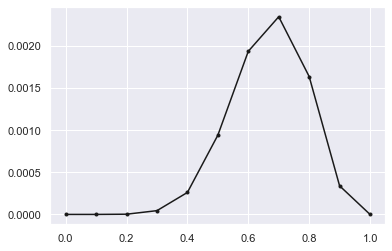

In [33]:
import random
import math

random.seed(42)


def draw(frac_red, k=20):
    # draw k chips from the bag comprising frac_red*100 red chips
    # and (1-frac_red)*100 green chips
    return random.sample(['red']*int(frac_red*100) + ['green']*int((1-frac_red)*100), k=k)


def calc_prob_single(outcome, frac_red):
    # calculate the probability of "outcome" occurring given
    # fraction of red chips, where outcome could be red or green
    assert(outcome in ('red', 'green'))
    if outcome == "red":
        return frac_red
    else:
        return 1 - frac_red


def update_frac(frac_red, total, result):
    # update the remaining chips in order to update the
    # fraction red value
    nums = [int(frac_red * total), int((1-frac_red) * total)]

    if result == "red":
        nums[0]-= 1
    else:
        nums[1]-= 1
    return float(nums[0]/sum(nums))


def calc_prob(results, frac_red, total):
    # initialise to 1 as we'll be multplying
    prob = 1
    # loop over the chips
    for result in results:
        # calculate the probability of the current chip 
        # based on the current frac_red (theta) value
        p = calc_prob_single(result, frac_red)
        prob *= p
        frac_red = update_frac(frac_red, total, result)
        
    return prob


TRUE_PROPORTION = 0.6

# Here we draw 100 chips from the bag, using the true proportion.
results = draw(TRUE_PROPORTION, k=100)

# From this point forth, we will only use the drawn chips in an attempt
# to estimate the true proportion of chips. 

# Possible values of the proportion: 0.0, 0.1, 0.2, 0.3, ...., 0.9, 1.0
allks = [x/10 for x in range(0, 11)]

# Calculate the probability of observing this data (i.e. likelihood), for each value of the proportion
probs = [calc_prob(results[0:10], x, 100) for x in allks]

print(probs)

print('Likelihood maximised at:', allks[np.argmax(probs)])

plt.clf()
plt.plot(allks, probs, 'k.-')
plt.show()

[962.3375240011661, 765.3426563838453, 556.4721127324299, 342.82704111292236, 126.23751319668413, 63.324272317215176, 50.47756288892548, 61.41641674332107, 256.7167975128601, 463.3718380175709, 638.7569185928751]
Likelihood maximised at: 0.0


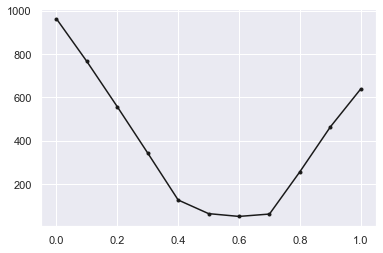

In [47]:
import random
import math

random.seed(42)


def draw(frac_red, k=20):
    # draw k chips from the bag comprising frac_red*100 red chips
    # and (1-frac_red)*100 green chips
    return random.sample(['red']*int(frac_red*100) + ['green']*int((1-frac_red)*100), k=k)


def calc_prob_single(outcome, frac_red):
    # calculate the probability of "outcome" occurring given
    # fraction of red chips, where outcome could be red or green
    assert(outcome in ('red', 'green'))
    if outcome == "red":
        return frac_red
    else:
        return 1 - frac_red


def update_frac(frac_red, total, result):
    # update the remaining chips in order to update the
    # fraction red value
    nums = [int(frac_red * total), int((1-frac_red) * total)]

    if result == "red":
        nums[0]-= 1
    else:
        nums[1]-= 1
    return float(nums[0]/sum(nums))


def calc_prob(results, frac_red, total):
    # initialise to 0 as we'll be suming
    prob = 0
    # loop over the chips
    for result in results:
        # calculate the probability of the current chip 
        # based on the current frac_red (theta) value
        p = calc_prob_single(result, frac_red)
        prob = prob - np.log(max(p, 1e-10)) # I need to avoid log(0)
        frac_red = update_frac(frac_red, total, result)
        
    return prob


TRUE_PROPORTION = 0.6

# Here we draw 100 chips from the bag, using the true proportion.
results = draw(TRUE_PROPORTION, k=100)

# From this point forth, we will only use the drawn chips in an attempt
# to estimate the true proportion of chips. 

# Possible values of the proportion: 0.0, 0.1, 0.2, 0.3, ...., 0.9, 1.0
allks = [x/10 for x in range(0, 11)]

# Calculate the probability of observing this data (i.e. likelihood), for each value of the proportion
probs = [calc_prob(results[0:70], x, 100) for x in allks]

print(probs)

print('Likelihood maximised at:', allks[np.argmax(probs)])

plt.clf()
plt.plot(allks, probs, 'k.-')
plt.show()

## Homework - the logistic function and its derivative

Plot the logistic function

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Compute and plot its derivative over the interval $z \in [-10,10]$.

How would you update this function so that it was centred at $z=5$, and had a "tighter" (i.e. faster) jump from zero to one?

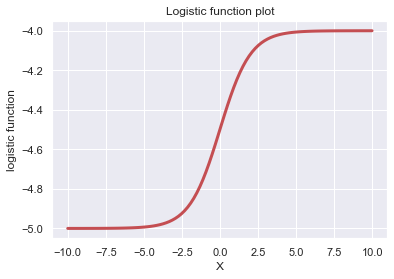

In [56]:
# Logistic function
x = np.linspace(-10, 10, 100)
y = (1 / (1 + np.exp(-x)))

plt.plot(x, y, 'r', linewidth = 3)
plt.xlabel('X')
plt.ylabel('logistic function')
plt.title('Logistic function plot')

plt.show()

In [67]:
from sympy import Symbol
import numpy as np

x = Symbol('x')
y = (1 / (1 + exp(-x)))
yprime = y.diff(x)
print(yprime)

exp(-x)/(1 + exp(-x))**2


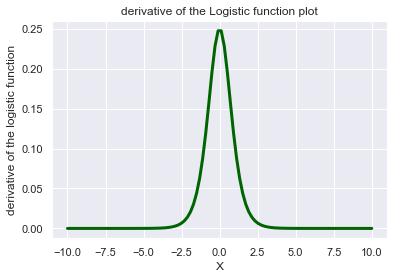

In [81]:
# Logistic function
x = np.linspace(-10, 10, 100)
y_d = (np.exp(-2*x)/(1 + np.exp(-2*x))**2)

plt.plot(x, y_d, 'darkgreen', linewidth = 3)
plt.xlabel('X')
plt.ylabel('derivative of the logistic function')
plt.title('derivative of the Logistic function plot')

plt.show()

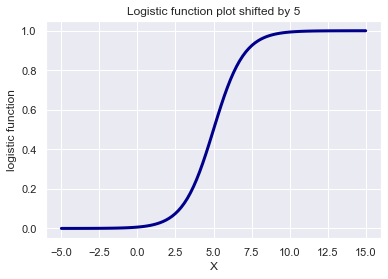

In [74]:
# To center it at z=5 
# Logistic function
x = np.linspace(-5, 15, 100)
y_d = (1 / (1 + np.exp(5-x))) # Exp(5-x)

plt.plot(x, y_d, 'darkblue', linewidth = 3)
plt.xlabel('X')
plt.ylabel('logistic function')
plt.title('Logistic function plot shifted by 5')

plt.show()

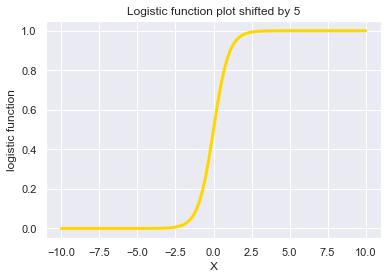

In [88]:
# To increase the jump
# Logistic function
x = np.linspace(-10, 10, 100)
y_d = (1 / (1 + np.exp(-2*x))) # Exp(-2x)

plt.plot(x, y_d, 'gold', linewidth = 3)
plt.xlabel('X')
plt.ylabel('logistic function')
plt.title('Logistic function plot shifted by 5')

plt.show()

## Homework - PCA for the Iris dataset [$\star$]

We saw in lecture 3 the singular value decomposition (SVD), and I noted that it's closely related to the concept of principal component analysis (PCA).

Read through this material on the application of PCA to the Iris dataset
<https://www.kaggle.com/shrutimechlearn/step-by-step-pca-with-iris-dataset>